In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Train.csv")

In [4]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [5]:
df.shape

(10999, 12)

In [6]:
df_medium = df[df["Product_importance"]=="medium"]
Product_importance_mean =df_medium["Cost_of_the_Product"].mean()
Product_importance_max =df_medium["Cost_of_the_Product"].max()
Product_importance_min =df_medium["Cost_of_the_Product"].min()
print(f"Cost_of_the_Product in Product_importance_medium mean : {Product_importance_mean}")
print(f"Cost_of_the_Product in Product_importance_medium max : {Product_importance_max}")
print(f"Cost_of_the_Product in Product_importance_medium min : {Product_importance_min}")

Cost_of_the_Product in Product_importance_medium mean : 209.38241480858224
Cost_of_the_Product in Product_importance_medium max : 310
Cost_of_the_Product in Product_importance_medium min : 96


In [7]:
df_low = df[df["Product_importance"]=="low"]
Product_importance_mean =df_low["Cost_of_the_Product"].mean()
Product_importance_max =df_low["Cost_of_the_Product"].max()
Product_importance_min =df_low["Cost_of_the_Product"].min()
print(f"Cost_of_the_Product in Product_importance_low mean : {Product_importance_mean}")
print(f"Cost_of_the_Product in Product_importance_low max : {Product_importance_max}")
print(f"Cost_of_the_Product in Product_importance_low min : {Product_importance_min}")

Cost_of_the_Product in Product_importance_low mean : 212.05984519539362
Cost_of_the_Product in Product_importance_low max : 310
Cost_of_the_Product in Product_importance_low min : 96


In [8]:
df_high = df[df["Product_importance"]=="high"]
Product_importance_mean =df_high["Cost_of_the_Product"].mean()
Product_importance_max =df_high["Cost_of_the_Product"].max()
Product_importance_min =df_high["Cost_of_the_Product"].min()
print(f"Cost_of_the_Product in Product_importance_high mean : {Product_importance_mean}")
print(f"Cost_of_the_Product in Product_importance_high max : {Product_importance_max}")
print(f"Cost_of_the_Product in Product_importance_high min : {Product_importance_min}")

Cost_of_the_Product in Product_importance_high mean : 203.87130801687763
Cost_of_the_Product in Product_importance_high max : 307
Cost_of_the_Product in Product_importance_high min : 96


In [9]:
 gender = df.pivot_table(index="Gender",columns="Product_importance",values="Cost_of_the_Product",aggfunc="count")
 gender

Product_importance,high,low,medium
Gender,,,
F,470,2652,2423
M,478,2645,2331


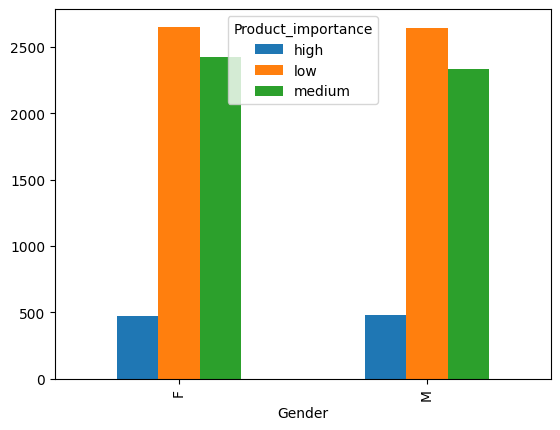

In [10]:
gender.plot(kind='bar')
plt.show()

In [11]:
Custmor_rating_K = df.pivot_table(index="Product_importance",values="Customer_rating",aggfunc="mean")
Custmor_rating_K

,Customer_rating
Product_importance,
high,2.993671
low,2.983576
medium,2.997686


In [12]:
Discount_offrtrd = df.pivot_table(index="Discount_offered",values="Cost_of_the_Product",aggfunc="mean")
Discount_offrtrd

,Cost_of_the_Product
Discount_offered,
1,214.014563
2,215.913753
3,214.894048
4,213.181818
5,213.454321
...,...
61,204.981132
62,200.734694
63,196.245283


<AxesSubplot:title={'center':'Discount_offered vs Cost_of_the_Product'}, xlabel='Discount_offered'>

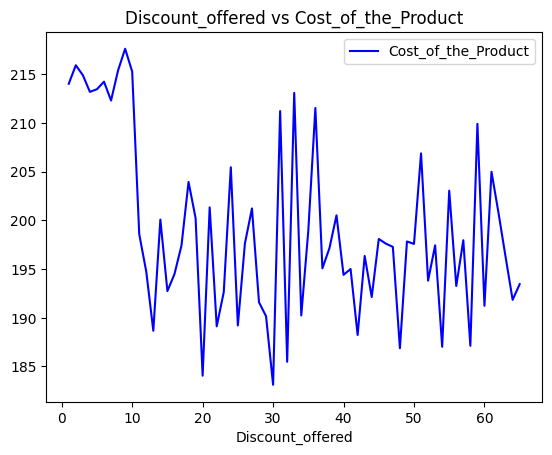

In [13]:
Discount_offrtrd.plot(color='blue',title =  "Discount_offered vs Cost_of_the_Product")

<AxesSubplot:xlabel='Mode_of_Shipment', ylabel='count'>

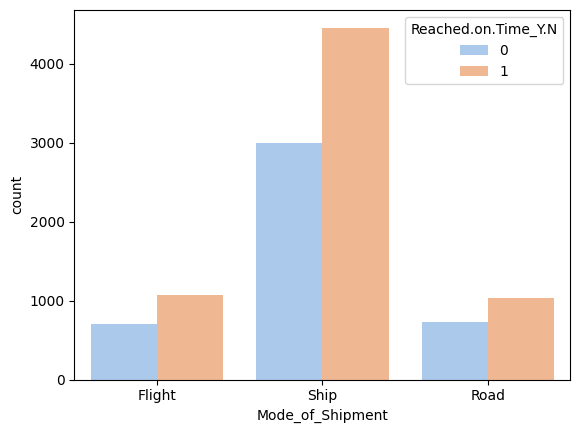

In [14]:
sns.countplot(data=df,x="Mode_of_Shipment",hue='Reached.on.Time_Y.N',palette="pastel")

In [15]:
Product_importance = df["Product_importance"].value_counts()

C:\Users\29492\AppData\Local\Temp\ipykernel_18008\671420949.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


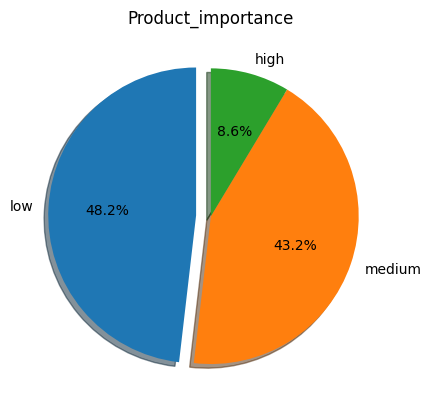

In [16]:
explode = (0.1, 0, 0)
fig , ax = plt.subplots()
ax.pie(Product_importance,labels=Product_importance.index,explode=explode,autopct='%1.1f%%',shadow=True, startangle=90)
ax.set(aspect="equal", title='Product_importance')
fig.show()